# Evaluating and Optimizing Machine Learning Techniques for Automatic Nuclei Detection

**Rebecca Han and Jack Findley**

**ChBE 8803 Final Report**

# 1. Introduction and Background

<b>1. Motivation</b>

Many people die from cancer every year. This is terribly sad. :’( We would like to prevent this. One option is to identify the cancer early; treatment of nascent cancers tends to be more successful. Often, cells suffering from cancer display different biomarkers in their nuclei. These biomarkers can be seen in immunohistochemical (IHC) imaging. If there were a rapid and accurate way to screen images for cancerous cells, many cancer prognoses could be improved. We aim to develop an automated cell nuclei detection technique.

<b>2. Challenges</b>

Imaging conditions can vary tremendously - illumination, contrast, fluorescence and staining will all affect the appearance of the cell. We would also like our technique to be generalizable to many cell types because cancer is insidious and affects many cell types. Depending on the biological sample that was imaged, cells may also be aggregated; where a trained eye could distinguish individual nuclei, an algorithm might falter. 

<b>3. Pre-treatment and Initial Segmentation (“Detection”)</b>

Colour is usually either normalized or thresholded to remove noise and background [1]. A variety of pre-processing techniques can be used to find objects, from conventional blob detection, to morphological and/or contour resolution, to watershed segmentation [2-4]. We will use sensible discretion to pick a pre-treatment technique.

<b>4. Segmentation and Identification</b>

There are two primary approaches to nuclei segmentation:

<b><i>Traditional methods segment nuclei from single or overlapping cells</i></b>

Several traditional methods, often involving a-priori knowledge of cell shape and size [5]. First, cell clusters are segmented from the background by concavity [6-7]. Next, cell clusters can be separated into individual cells based on the concavity of the intensity distribution [7]. After individual cells have been identified, cell boundaries are often approximated using elliptical curve-fitting techniques [5,7]. Further segmentation can be applied to separate the cell nucleus from the cytoplasm. A gradient vector flow active contour model (GVF-ACM) has been shown to find boundaries between the nucleus and cytoplasm [8].

In this work, we can begin performing segmentation using the scikit-image package for python. This package includes methods for ellipse and boundary fitting, as well as edge detection and active contour modeling.

<b><i>Machine learning methods identify nuclei via classification algorithms</i></b>

Machine learning and pattern recognition have been successfully used to identify and segment cells in IHC images [9]. Whether using techniques such as cluster analysis [10], random forests [9], or deep neural networks [11-13], the workflow is similar. First, initial segmentation is performed (often in the pre-treatment step) to find cells and agglomerates. Then, training data is fed through a classifier to extract the most important features. Repeating this process while keeping only the most important feature vectors establishes a model, which is finally used to classify new test data.

We will start with cluster analysis and random forest classifiers (from the scikit-learn package), but likely will also employ traditional GVF or ellipse-fitting algorithms (which we will implement in python) to refine initial segmentation. If necessary, we also intend to look into convolutional neural networks implemented with the TensorFlow package.

### References

[1] M. Veta, P.J. Van Diest, R. Kornegoor, A. Huisman, M.A. Viergever, and J.P.W. Pluim. (<b>2013</b>) Automatic Nuclei Segmentation in H&E Stained Breast Cancer Histopathology Images. <i>PLoS One</i>, 8, 7.

[2] X. Yang, H. Li, and X. Zhou. (<b>2006</b>) Nuclei Segmentation using Marker-Controlled Watershed, Tracking using Mean-Shift, and Kalman Filter in Time-Lapse Microscopy. <i>IEEE Trans. Circuits Syst. I, Reg. Papers.</i>, 53, 11.

[3] J. Cheng and J.C. Rajapakse. (<b>2009</b>) Segmentation of Clustered Nuclei with Shape Markers and Marking Function. <i>IEEE Trans. Biomed. Eng.</i>, 56, 3.

[4] S. Ali and A. Madabhushi, “An Integrated Region-, Boundary-, Shape-Based Active Contour for Multiple Object Overlap Resolution in Histological Imagery. <i>IEEE Trans. Med. Imag.</i>, 31, 7.

[5] S. Kothari, Q. Chaudry, M.D. Wang. (2009) Automated Cell Counting and Cluster Segmentation Using Concavity Detection and Ellipse Fitting Techniques. <i>Proc. IEEE Int. Symp. Biomed. Imaging</i>, 795.

[6] Y. Toyoshima, T. Tokunaga, O. Hirose, M. Kanamori, T. Teramoto, M.S. Jang, S. Kuge, T. 
Ishihara, R. Yoshida, and Y. Iino. (<b>2006</b>) Accurate Automatic Detection of Densely Distributed Cell Nuclei in 3D Space. <i>PLoS. Comput. Biol.</i>, 12, 6.

[7] H.S. Wu, J. Gil, and J.Barba. (<b>1998</b>) Optimal Segmentation of Cell Images. <i>IEE P-Vis. Image. Sign.</i>, 145, 1.

[8] S.F. Yang-Mao, Y.K. Chan, and Y.P. Chu. (<b>2008</b>) Edge enhancement nucleus and cytoplast contour detector of cervical smear images. <i>IEEE Trans. Syst. Man, Cybern. B</i>, 38, 2.

[9] O. Rujuta and A.J. Vyavahare. (<b>2017</b>) Review of Nuclei Detection, Segmentation in Microscopic Images. <i>J. Bioengineer. Biomed. Sci.</i>, 7, 2.

[10] S. Wienert, D. Heim, K. Saeger, A. Stenzinger, M. Beil, P. Hufnagl, M. Dietel, C. Denkert, F. Klauschen. (<b>2012</b>) Detection and Segmentation of Cell Nuclei in Virtual Microscopy Images: A Minimum-Model Approach. <i>Sci. Rep.</i>, 2, 503.

[11] S.K. Sadanandan, P. Ranefall, S. Le Guyader, and C. Wahlby. (<b>2017</b>) Automated Training of Deep Convolutional Neural Networks for Cell Segmentation. <i>Sci. Rep.</i>, 7, 1.

[12] K. Sirinukunwattana, S.E.A. Raza, Y.W Tsang, I.A. Cree, D.R.J. Snead, and N.M. Rajpoo. (<b>2016</b>) Locality Sensitive Deep Learning for Detection and Classification of Nuclei in Routine Colon Cancer Histology Images. <i>IEEE Trans. Med. Imag.</i>, 35, 99.

[13] N. Kumar, R. Verma, S. Sharma, S. Bhargava, A. Vahadane, and A. Sethi. (<b>2017</b>) A Dataset and a Technique for Generalized Nuclear Segmentation for Computational Pathology. <i>IEEE Trans. Med. Imag.</i>, 36, 7.

## 1.1. Running the project

After we built and trained the models used, we have the option of saving them as 'pickles' (serialized Python objects) or in the form of .csv files. Re-loading these is convenient and efficient when training on the same dataset, and the default use will be to import as much pre-run data as possible.

#### Change the following to the path where you have downloaded the project zip

In [1]:
path = '/Users/arrakis/Dropbox/Tool - Classes/ChBE 8803/Project'

In [29]:
n_samples = 665 # 665 total datasets in train

rebuild_xytrain = 'no' # default 'no', only re-train if the input feature vector has since changed
x_name = 'X_train_FullSample.csv'
y_name = 'Y_train_FullSample.csv'

retrain_forest = 'no' # default 'no', only re-train if the input feature vector has since changed
clf_name = 'Random_Forest_FullSample.pkl' # random forest model saved 04/08, trained on 665 training samples

rescore_rfc = 'no'
ws_name = 'Score_Watershed_FullSample.csv'
rfc_name = 'Score_RandomForest_FullSample.csv'

recluster = 'no'

retrain_kmeans_forest = 'no' # default 'no', only re-train if the input feature vector has since changed
clf_name_0 = 'Random_Forest_KMEANS_0.pkl'
clf_name_1 = 'Random_Forest_KMEANS_1.pkl'
clf_name_2 = 'Random_Forest_KMEANS_2.pkl'
clf_name_3 = 'Random_Forest_KMEANS_3.pkl'
clf_name_4 = 'Random_Forest_KMEANS_4.pkl'
clf_name_5 = 'Random_Forest_KMEANS_5.pkl'

rescore_kmrfc = 'no'
kmrfc_name = 'Score_KmeansRFC_FullSample.csv'
kmrfc_cm = 'cm_kmrfc.csv'
###################################################################

## 1.2. Package requirements

* numpy version 1.13.3
* pandas version 0.20.3
* matplotlib version
* sklearn version 0.19.1
* skimage version 0.13.0
* cv2 (used for image processing)
    * See lines 1-3 in the next block for installation on mac (version 3.2.0.6)
    * For PC, installation worked with pip install opencv-python from the anaconda prompt (version 3.4.0)


In [3]:
# import sys
# !{sys.executable} -m pip install opencv-python==3.2.0.6 # for mac
# >> https://stackoverflow.com/questions/47963386/image-not-found-error-after-installing-opencv-python-wheel-on-mac

## load all packages used below
import zipfile, io, time, sklearn, cv2
import numpy as np
import pandas as pd
import pylab as plt
import matplotlib.image as mpimg
from scipy import ndimage
from scipy.ndimage import label
from skimage import feature
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu, sobel, laplace
from skimage.morphology import watershed
from sklearn import svm, linear_model
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib
from sklearn.cluster import KMeans 

## 1.3. Dataset

* ```stage1_train.zip```: zipped training set of 665 images, each with between 4 and ~380 masks (total = 32145 files)
* ```stage1_test.zip```: zipped test set of 65 images

Because these datasets are so large, we use ```load_zipped_img``` to access the .zip file directly and read out images and associated masks without extracting the .zip into a folder.

In [4]:
def load_zipped_img(path, img_index): # load an image and all its masks
    z = zipfile.ZipFile(path,'r') # access zip folder
    zlist = z.namelist() # list of files in zip folder
    
    img_name = zlist[img_index] # get selected image
    img_name = img_name[0:-1] # eliminate "/"
    
    # get image and return as np array
    img_raw = z.read('{}/images/{}.png'.format(img_name,img_name)) # get raw image
    img = io.BytesIO(img_raw) # convert image
    img = mpimg.imread(img) # numpy array
    img = np.flip(img,0) # flip image
    
    # get all masks and return as np array
    mask_list = []
    for string in zlist:
        if string.startswith(img_name+'/mask'):
            mask_list.append(string)
    mask_list = mask_list[1:-1] # list of masks
    
    masks = []
    for m in mask_list:
        mask_raw = z.read(m) # get raw mask
        mask = io.BytesIO(mask_raw) # convert mask
        mask = mpimg.imread(mask) # numpy array
        mask = np.flip(mask,0) # flip mask
        masks.append(mask)
        
    return img, masks

In [5]:
title_size = 22

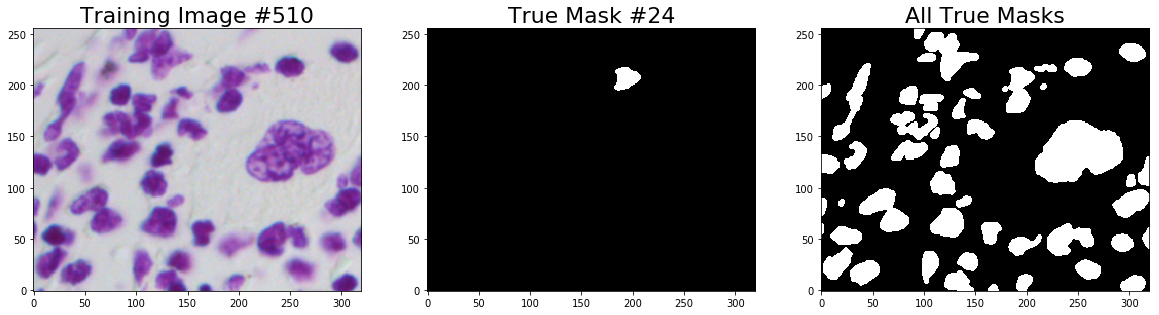

In [6]:
# WORKING EXAMPLE OF load_zipped_img

(img, masks) = load_zipped_img(path+'/stage1_train.zip',510)

fig, ax = plt.subplots(1,3, figsize = (20,15))
ax[0].imshow(img, origin='lower')
ax[0].set_title('Training Image #510', fontsize=title_size)
ax[1].imshow(masks[24], origin='lower', cmap='bone')
ax[1].set_title('True Mask #24', fontsize=title_size)
ax[2].imshow(sum(masks), origin='lower', cmap='bone')
ax[2].set_title('All True Masks', fontsize=title_size)
plt.show()
# plt.savefig('fig1.png')

# 2. Methods: Overview

We were able to achieve a good level of success by using several approaches sequentially at first, then in tandem, drawing on what is most commonly used in literature as well as what we learned in class. Listed below are the main methods we tried, from simplest (and worst performing) to most sophisticated (and best performing); even though thresholding and watershed segmentation gave very poor predictions of cell nuclei, they were useful ways to process the image data for further classification and clustering.

* Section 2.1. Otsu's thresholding

* Section 2.2. Watershed segmentation

* Section 2.3. Random forest classification

* **Section 4.2.** K-means clustering + random forest classification

PCA, SVM, and active contour fitting are other approaches that we tried, but were ultimately unable to implement because of excessive algorithm run time. We had a few ideas on how to further pre-process the dataset for faster run-time, but our results using K-means clustering + random forest were sufficiently promising that we did not carry out additional refinement.

## 2.1. Detection: Otsu's thresholding

Otsu's thresholding binarizes a grayscale image and classify pixels as object (label 1) or background (label 0). This is a clustering method, which finds the optimum threshold value for pixel intensity by searching exhaustively for a threshold such that within-class variance is minimized (i.e. between-class variance is maximized). It assumes the pixel intensities follow a bimodal distribution and we will see an example where violating this assumption create poor thresholding.

<i>
* ```grayscale``` converts images from rgb to grayscale
* ```otsu``` selects an optimal threshold for equal inter-/intra-class variance
* ```float2int8``` converts the data type to int8, which is required for the cv2 package</i>

In [7]:
# convert to grayscale
def grayscale(im):
    return rgb2gray(im)

# Otsu's method
def otsu(image_gray):
    threshold_val = threshold_otsu(image_gray) #Select threshold from Otsu's method
    img_masked = np.where(image_gray > threshold_val, 1, 0)

    if np.sum(img_masked==0) < np.sum(img_masked==1):
        img_masked = np.where(img_masked, 0, 1)
    return img_masked

# Function to convert float32 raw images to int8 single channel
def float2int8(img_float):
    img_int8 = (img_float * 255).round().astype(np.uint8)
    return img_int8

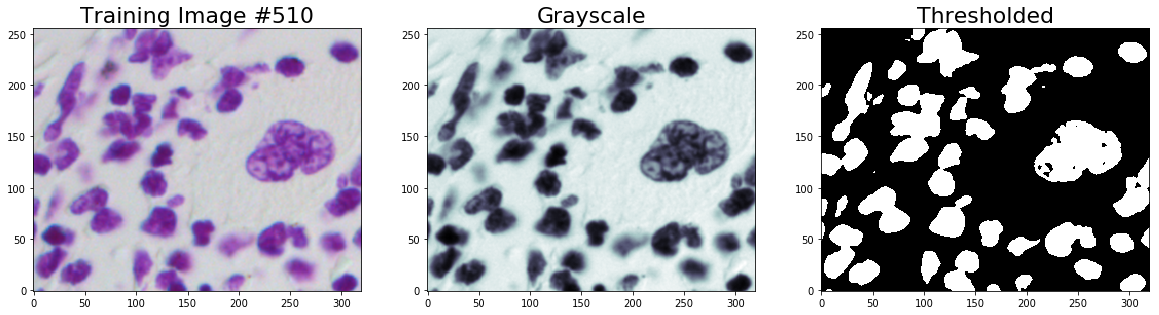

In [8]:
fig, ax = plt.subplots(1,3, figsize = (20,20))
ax[0].imshow(img, origin='lower')
ax[0].set_title('Training Image #510', fontsize=title_size)
ax[1].imshow(grayscale(img), origin='lower', cmap='bone')
ax[1].set_title('Grayscale', fontsize=title_size)
ax[2].imshow(otsu(grayscale(img)), origin='lower', cmap='bone')
ax[2].set_title('Thresholded', fontsize=title_size)
plt.show()
# plt.savefig('fig2.png')

Thresholding does a good job at detecting objects (for this image), although it does not segment individual nuclei. 

We can also look at how well the thresholded mask compares to the true mask (the sum of all individual true masks)

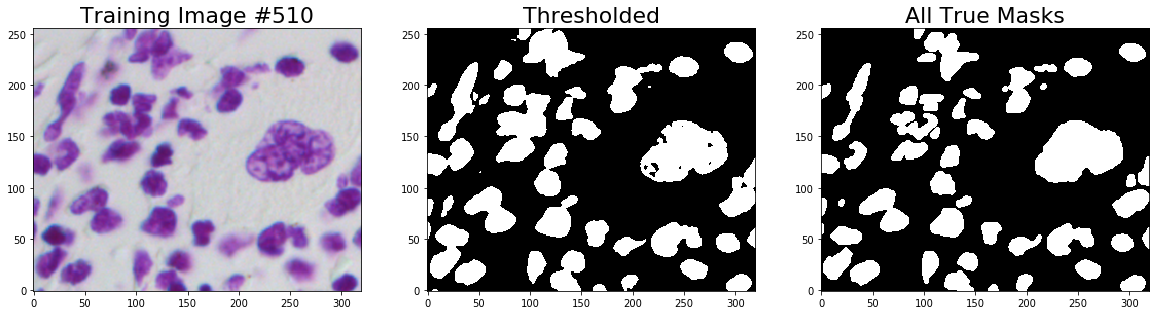

In [9]:
fig, ax = plt.subplots(1,3, figsize = (20,20))
ax[0].imshow(img, origin='lower')
ax[0].set_title('Training Image #510', fontsize=title_size)
ax[1].imshow(otsu(grayscale(img)), origin='lower', cmap='bone')
ax[1].set_title('Thresholded', fontsize=title_size)
ax[2].imshow(sum(masks), origin='lower', cmap='bone')
ax[2].set_title('All True Masks', fontsize=title_size)
plt.show()
# plt.savefig('fig3.png')

Thresholding tends to over-predict objects (we will momentarily demonstrate that this can be much more serious for other types of images). There are also spurious holes and other artefacts, as seen in the largest blob on the right side of the image.

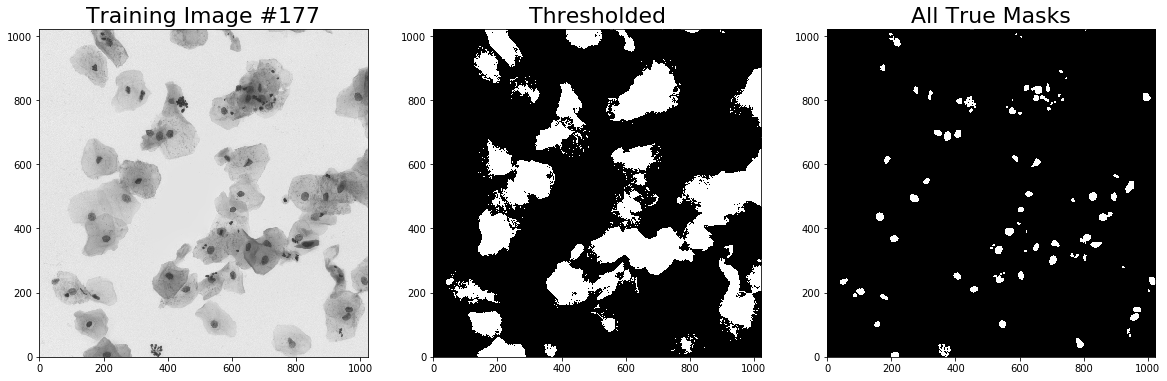

In [10]:
(img, masks) = load_zipped_img(path+'/stage1_train.zip',177)

fig, ax = plt.subplots(1,3, figsize = (20,20))
ax[0].imshow(img, origin='lower')
ax[0].set_title('Training Image #177', fontsize=title_size)
ax[1].imshow(otsu(grayscale(img)), origin='lower', cmap='bone')
ax[1].set_title('Thresholded', fontsize=title_size)
ax[2].imshow(sum(masks), origin='lower', cmap='bone')
ax[2].set_title('All True Masks', fontsize=title_size)
plt.show()
# plt.savefig('fig4.png')

Otsu's method of thresholding fails to detect nuclei in images where intensities do not follow a bimodal distribution, such as in these images where there are three distinct 'modes' - background, cytoplasm, and nuclei (the dark centers).

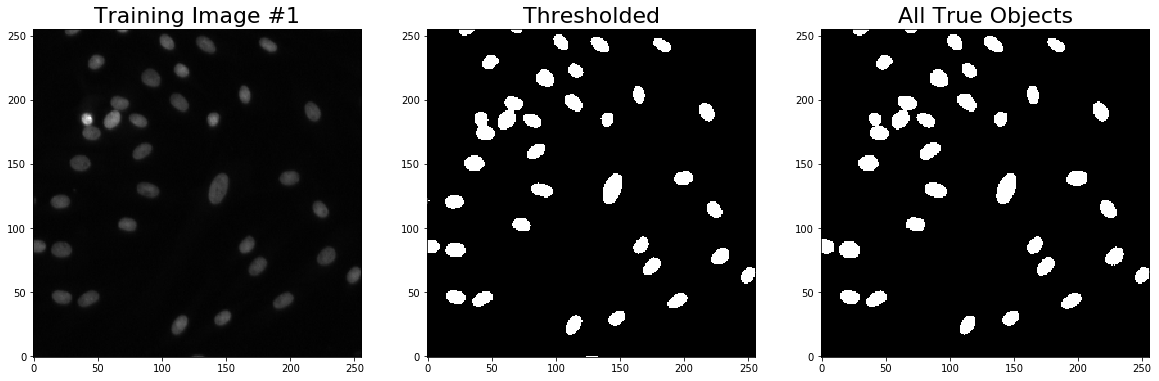

In [11]:
(img, masks) = load_zipped_img(path+'/stage1_train.zip',1)

fig, ax = plt.subplots(1,3, figsize = (20,20))
ax[0].imshow(img, origin='lower')
ax[0].set_title('Training Image #1', fontsize=title_size)
ax[1].imshow(otsu(grayscale(img)), origin='lower', cmap='bone')
ax[1].set_title('Thresholded', fontsize=title_size)
ax[2].imshow(sum(masks), origin='lower', cmap='bone')
ax[2].set_title('All True Objects', fontsize=title_size)
plt.show()
# plt.savefig('fig5.png')

Not surprisingly, the thresholding is most successful for cell types / images where nuclei are solid, distinct and not aggregated.

## 2.2. Segmentation: Watershed algorithm

Watershed segmentation separates objects into individual nuclei. The grayscale pixel intensities can be converted into a relief map, where the cell nuclei are local minima. We then flood this landscape from 'water sources' located in the minima, and build watershed lines where waters from different sources meet. These watershed lines are edges of objects and the catchment basins are the objects.

<u>Advantages</u>: watershed segmentation is intuitive, parallelizable, and the resulting boundaries always form closed and connected regions

<u>Disadvantages</u>: watershed tends to over-segment, unable to capture cell overlap (because we prevent waters from merging) if the seeds (initial basins) are not well chosen

<i>
```watershed``` takes an image and outputs
* ```img_guess```: the binarized image guessed by watershed segmentation (watershed lines = cell outlines in red)
* ```markers```: separated cells identified by watershed segmentation (the catchment basis)
* ```sure_bg```: certain background pixels
* ```sure_fg```: certain object pixels
* ```uncertain```: the region between sure_bg and sure_fg</i>

In [12]:
# Function to watershed segment images
def watershed(img_float32):
    img = img_float32[:, :, :3]
    
    # convert input image (float32) to 3-channel int8
    ch1 = float2int8(otsu(img[:,:,0:1][:,:,0]))
    ch2 = float2int8(otsu(img[:,:,1:2][:,:,0]))
    ch3 = float2int8(otsu(img[:,:,2:3][:,:,0]))
    img_guess = cv2.merge([ch1,ch2,ch3])
    
    # greyscale and otsu threshold original image
    img_grey = grayscale(img)
    int8_thresh = float2int8(otsu(img_grey))

    # noise removal
    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(int8_thresh,cv2.MORPH_OPEN,kernel,iterations=2)
    
    # find sure background area
    sure_bg = cv2.dilate(opening,kernel,iterations=3)
    
    # find sure foreground area
    dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
    ret, sure_fg = cv2.threshold(dist_transform,0.2*dist_transform.max(),255,0)
    sure_fg = np.uint8(sure_fg)

    # finding uncertain region
    uncertain = cv2.subtract(sure_bg,sure_fg)
    
    # marker labelling
    ret, markers = cv2.connectedComponents(sure_fg)
    markers = markers+1 # add one to all labels so sure background is 1 (not 0)
    markers[uncertain==255] = 0 # mark unknown region as 0

    # apply watershed and mark boundary as -1
    markers = cv2.watershed(img_guess, markers)
    img_guess[markers == -1] = [255,0,0]

    return img_guess, markers, sure_bg, sure_fg, uncertain

Predicted number of nuclei (catchments): 256
True number of nuclei (masks): 35


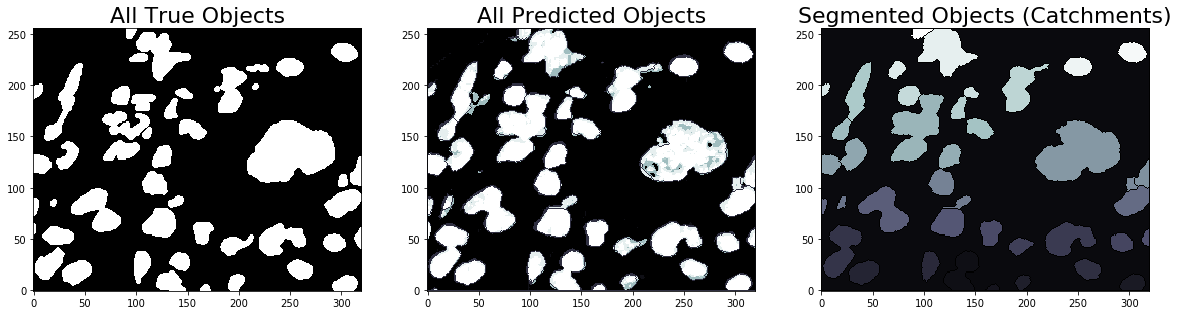

In [13]:
# WORKING EXAMPLE OF watershed

(img, mask) = load_zipped_img(path+'/stage1_train.zip', 510)

img_guess, markers, sure_bg, sure_fg, uncertain = watershed(img)

fig, ax = plt.subplots(1,3, figsize = (20,20))

print('Predicted number of nuclei (catchments):', len(markers))
print('True number of nuclei (masks):', len(masks))

ax[0].imshow(sum(mask), origin='lower', cmap='bone')
ax[0].set_title('All True Objects', fontsize=title_size)
ax[1].imshow(grayscale(img_guess), origin='lower', cmap='bone')
ax[1].set_title('All Predicted Objects', fontsize=title_size)
ax[2].imshow(markers, origin='lower', cmap='bone')
ax[2].set_title('Segmented Objects (Catchments)', fontsize=title_size)
plt.show()
# plt.savefig('fig6.png')

As we disclosed earlier, watershed notoriously over-segments images because it does not allow any cell overlap. However, the detected edges are much closer to the true objects than the thresholding, and summed area of all masks is significantly closer to true summed area.

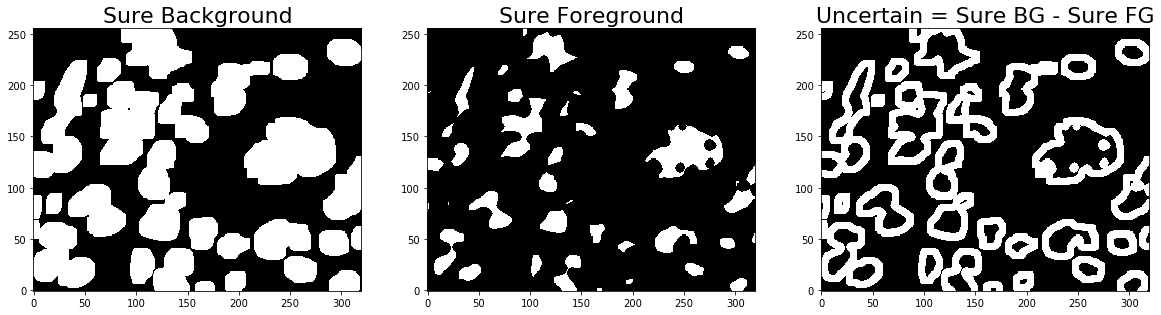

In [14]:
fig, ax = plt.subplots(1,3, figsize = (20,20))

ax[0].imshow(sure_bg, origin='lower', cmap='bone')
ax[0].set_title('Sure Background', fontsize=title_size)
ax[1].imshow(sure_fg, origin='lower', cmap='bone')
ax[1].set_title('Sure Foreground', fontsize=title_size)
ax[2].imshow(uncertain, origin='lower', cmap='bone')
ax[2].set_title('Uncertain = Sure BG - Sure FG', fontsize=title_size)
plt.show()
# plt.savefig('fig7.png')

The uncertain area contains the relevant pixels that need to be classified. We have discarded most of the "empty" pixels in the background. This is the reduced image vector on which we will subsequently train our dimensionality reduction (SVM, PCA) and classification algorithms (K-means clustering, random forest). 

## 2.3. Classification: Random decision forests

Decision tree classifiers are supervised learning algorithms, which means they are trying to classify a target variable (in this case whether the pixel's class is object or background). Given a dataset (all training image "uncertain" pixels), the decision tree splits the data according to some feature, at some value of that feature. A regression algorithm is used to find the key feature(s) and value(s) that minimize the entropy (variance) between the sets that result from data splitting.

Random forests are ensembles of decision trees where each pixel's class is the mode of the individual trees. This corrects for the decision trees' notorious overfitting and forests therefore tend to have higher accuracy than single trees. 

<u>Advantages</u>: scale invariant, transformation invariant, robust to inclusion of irrelevant features, good accuracy (low variance)

<u>Disadvantages</u>: less inspectable than decision trees

X = feature vector (6 columns):
* grayscale pixel intensity (continuous)
* watershed prediction for a pixel (discrete)
* magnitude of the Sobel gradient or Laplacian of pixel intensity (discrete)
* intensity for each of the rgb colour channels (continuous)

Y = a vector containing the sum of the one-indexed masks for each image (the correct nuclei)

In [15]:
def make_full_feature(img):
    
    (img_guess, markers, sure_bg, sure_fg, uncertain) = watershed(img)
    
    intensity = grayscale(img) # grayscale pixel intensity, continuous
    img_guess = grayscale(img_guess)
    
    filter_sobel = sobel(grayscale(img)).reshape(-1,1) # gradient of pixel intensity, discrete
    filter_laplace = laplace(grayscale(img)).reshape(-1,1) # Laplacian of pixel intensity, discrete
    
    intensity_raw = intensity.reshape(-1,1)
    watershed_predict = img_guess.reshape(-1,1) # watershed prediction for each pixel, discrete
    
    img3 = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    r,g,b = cv2.split(img3)
    r = r.reshape(-1,1)
    g = g.reshape(-1,1)
    b = b.reshape(-1,1)
    
    full_feature = np.concatenate((intensity_raw, watershed_predict, filter_sobel, filter_laplace, r, g, b), axis = 1)
    
    return full_feature

In [16]:
if rebuild_xytrain == 'yes':
    # Build X_train and Y_train
    x_train = np.zeros(7).reshape(1,7) # feature vector
    y_train = np.zeros(1) # true pixel values

    start = time.time()
    for i in range(0, n_samples):
        (img, masks) = load_zipped_img(path+'/stage1_train.zip', i) # loads image and associated masks
        
        (img_guess, markers, sure_bg, sure_fg, uncertain) = watershed(img)
    
        intensity = grayscale(img) # grayscale pixel intensity, continuous
        img_guess = grayscale(img_guess)

        filter_sobel = sobel(grayscale(img))[uncertain==255].reshape(-1,1) # gradient of pixel intensity, discrete
        filter_laplace = laplace(grayscale(img))[uncertain==255].reshape(-1,1) # Laplacian of pixel intensity, discrete

        intensity_raw = intensity[uncertain==255].reshape(-1,1)
        watershed_predict = img_guess[uncertain==255].reshape(-1,1) # watershed prediction for each pixel, discrete

        img3 = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        r,g,b = cv2.split(img3)
        r = r[uncertain==255].reshape(-1,1) # red colour channel intensity, continuous
        g = g[uncertain==255].reshape(-1,1)
        b = b[uncertain==255].reshape(-1,1)

        feature = np.concatenate((intensity_raw, watershed_predict, filter_sobel, filter_laplace, r, g, b), axis = 1)

        y_raw = sum(masks)
        y_raw = y_raw[uncertain==255].reshape(-1,1)

        x_train = np.append(x_train, feature).reshape(-1,7)
        y_train = np.append(y_train, y_raw).reshape(-1,1)

    end = time.time()
    print('Time elapsed for ', n_samples, 'training images:', (end-start))
          
    x_train = x_train[1:,:]
    y_train = y_train[1:,0]
          
    # Save X_train and Y_train
    np.savetxt(x_name, x_train, delimiter=',')
    np.savetxt(y_name, y_train, delimiter=',')
else: 
    # Load pre-built X_train and Y_train
    start = time.time()
    x_train = np.loadtxt(x_name, delimiter=',')
    y_train = np.loadtxt(y_name, delimiter=',')
    end = time.time()
    print('Time elapsed to load pre-built X_train, Y_train:', (end-start))

Time elapsed to load pre-built X_train, Y_train: 381.2880620956421


In [17]:
if retrain_forest == 'yes':
    # Train random forest
    clf = RandomForestClassifier(max_depth=5, random_state=0)
    %time clf.fit(x_train, y_train)

    # Save random forest
    joblib.dump(clf, clf_name)
else:
    # Load pre-trained forest
    clf = joblib.load(clf_name)

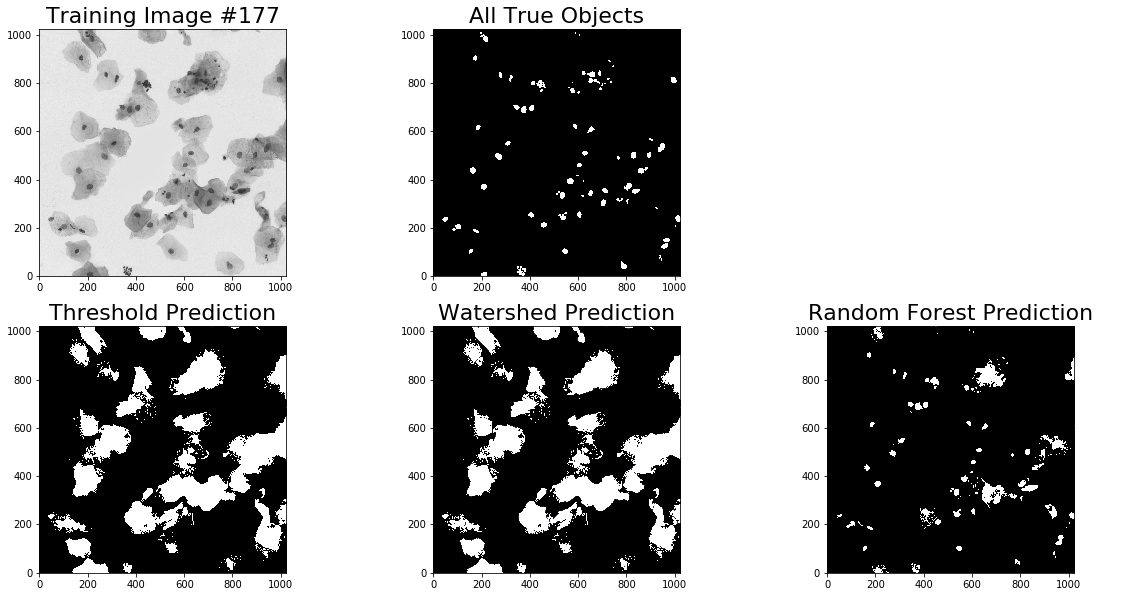

In [18]:
## PLOTTING RANDOM FOREST IMG177

(img, masks) = load_zipped_img(path+'/stage1_train.zip', 177)
(img_guess, markers, sure_bg, sure_fg, uncertain) = watershed(img)
img_shape = grayscale(img).shape

feature = make_full_feature(img)
yp = clf.predict(feature)

fig, ax = plt.subplots(2,3, figsize=(20,10))

ax[0,0].imshow(img, origin='lower')
ax[0,0].set_title('Training Image #177', fontsize=title_size)
ax[0,1].imshow(sum(masks), origin='lower', cmap='bone')
ax[0,1].set_title('All True Objects', fontsize=title_size)
ax[0,2].axis('off')
ax[1,0].imshow(otsu(grayscale(img)), origin='lower', cmap='bone')
ax[1,0].set_title('Threshold Prediction', fontsize=title_size)
ax[1,1].imshow(grayscale(img_guess), origin='lower', cmap='bone')
ax[1,1].set_title('Watershed Prediction', fontsize=title_size)
ax[1,2].imshow(grayscale(yp.reshape(img_shape[0], img_shape[1])), origin='lower', cmap='bone')
ax[1,2].set_title('Random Forest Prediction', fontsize=title_size)
plt.show()
# plt.savefig('fig8.png')

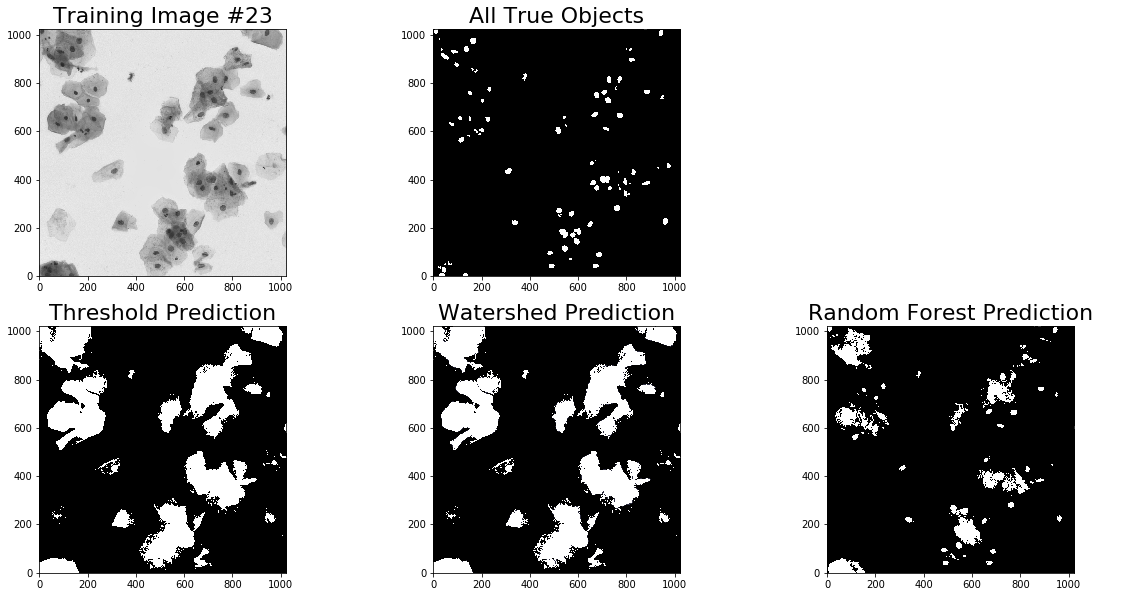

In [19]:
(img, masks) = load_zipped_img(path+'/stage1_train.zip', 23)
(img_guess, markers, sure_bg, sure_fg, uncertain) = watershed(img)
img_shape = grayscale(img).shape

feature = make_full_feature(img)
yp = clf.predict(feature)

fig, ax = plt.subplots(2,3, figsize=(20,10))

ax[0,0].imshow(img, origin='lower')
ax[0,0].set_title('Training Image #23', fontsize=title_size)
ax[0,1].imshow(sum(masks), origin='lower', cmap='bone')
ax[0,1].set_title('All True Objects', fontsize=title_size)
ax[0,2].axis('off')
ax[1,0].imshow(otsu(grayscale(img)), origin='lower', cmap='bone')
ax[1,0].set_title('Threshold Prediction', fontsize=title_size)
ax[1,1].imshow(grayscale(img_guess), origin='lower', cmap='bone')
ax[1,1].set_title('Watershed Prediction', fontsize=title_size)
ax[1,2].imshow(grayscale(yp.reshape(img_shape[0], img_shape[1])), origin='lower', cmap='bone')
ax[1,2].set_title('Random Forest Prediction', fontsize=title_size)
plt.show()
# plt.savefig('fig9.png')

Random forest is significantly better at identifying nuclei in images with cell overlap compared to the thresholding and segmentation predictions. We provide the same initial thresholding as input into both the watershed segmentation and random forest models, but the random forest classifier has essentially learned to split this image across a higher (darker) value for the grayscale intensisty feature. 

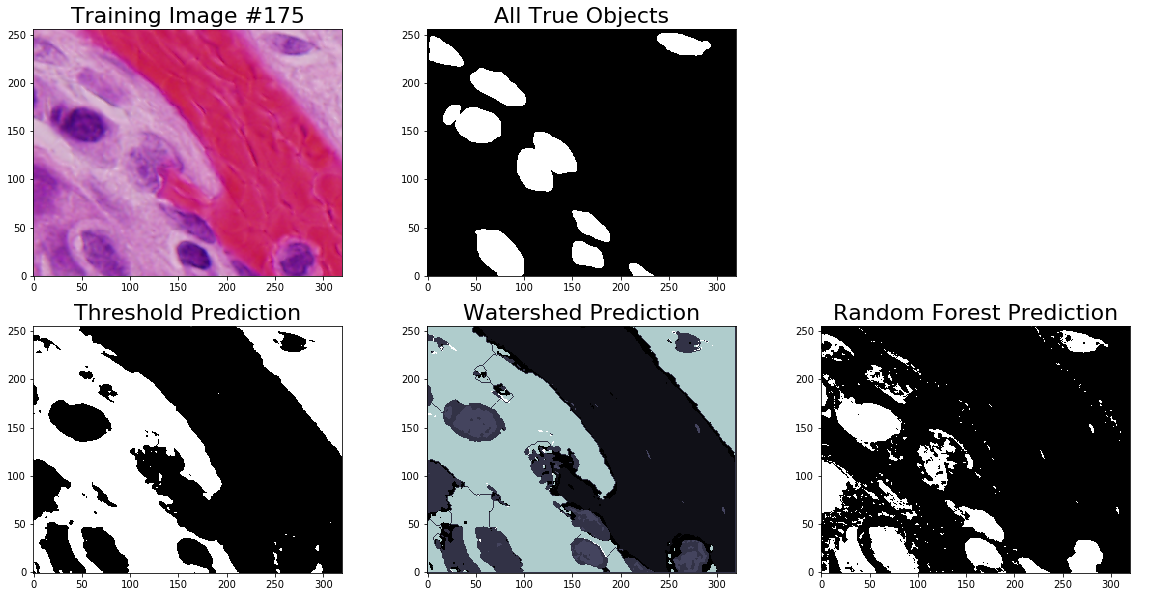

In [20]:
(img, masks) = load_zipped_img(path+'/stage1_train.zip', 175)
(img_guess, markers, sure_bg, sure_fg, uncertain) = watershed(img)
img_shape = grayscale(img).shape

feature = make_full_feature(img)
yp = clf.predict(feature)

fig, ax = plt.subplots(2,3, figsize=(20,10))

ax[0,0].imshow(img, origin='lower')
ax[0,0].set_title('Training Image #175', fontsize=title_size)
ax[0,1].imshow(sum(masks), origin='lower', cmap='bone')
ax[0,1].set_title('All True Objects', fontsize=title_size)
ax[0,2].axis('off')
ax[1,0].imshow(otsu(grayscale(img)), origin='lower', cmap='bone')
ax[1,0].set_title('Threshold Prediction', fontsize=title_size)
ax[1,1].imshow(grayscale(img_guess), origin='lower', cmap='bone')
ax[1,1].set_title('Watershed Prediction', fontsize=title_size)
ax[1,2].imshow(grayscale(yp.reshape(img_shape[0], img_shape[1])), origin='lower',cmap='bone')
ax[1,2].set_title('Random Forest Prediction', fontsize=title_size)
plt.show()
# plt.savefig('fig10.png')

Random forest also corrects a problem we saw with thresholding and segmentation where objects/background were sometimes flipped when their areas were roughly equivalent.

Although it is an improvement, it still struggles on noisy images, especially if nuclei are partially blocked (in this case by the large pink diagonal band).

In the literature, ellipse and/or active contour fitting are used to refine machine learning models based on the assumption that in each image (constant imaging resolution), nuclei should be similar sizes and shapes.

Instead of building such a complicated model (often used in conjunction with neural networks), we explore dimensionality reduction and clustering on the training data to improve our forest performance.

# 3. Results: Quantifying Error of Different Models

We looked at several accuracy metrics, and report the average across all 665 training images for convenience. However, we also flagged all images which were classified with < 70% accuracy OR precision to understand where the prediction was failing.

(1) Confusion matrix tells us how many false positives (FP), false negatives (FN), true positive (TP), true negatives (TN) for each image (and on average).

(2) Statistical error metrics relevant in binary classification
* Accuracy = (TP + TN) / (TP + FP + TN + FN) = (TP + TN) / (Total)
* Precision = (TP) / (TP + FP)
* Recall = (TP) / (TP + FN)
* F1 Score = 2$*$(precision $*$ recall) / (precision + recall)

(3) Jaccard index (also called intersection over union) is a standard metric in nuclei classification.<br>
This coefficient measures similarity between sample sets. For a proposed set of object pixels A and a set of true object pixels B,
$$IoU(A,B) = \frac{A \cap B}{A \cup B}.$$

In [21]:
# separates the objects in an image after a thresholding method has been applied
def separate_obj(img_masked):
    labels, nlabels = ndimage.label(img_masked)

    label_arrays = []
    for label_num in range(1, nlabels+1):
        label_mask = np.where(labels == label_num, 1, 0)
        label_arrays.append(label_mask)
    return labels, nlabels, label_mask

# separates a sum of masks into individual masks
def predicted_mask_list(total_mask): 
    obj_detected = np.max(total_mask) + 1
    mask_list_pred = []
    for i in range(1, obj_detected):
        mask_p = total_mask == i*np.ones(total_mask.shape)
        mask_list_pred.append(mask_p)
        
    return mask_list_pred

# determines intersection over union metric
def iou(img, predicted_masks, real_masks): 
    mask_iou = []
    mask_num = len(masks)
    
    pred_mask_num = len(predicted_masks)
    for i in range(0, mask_num):
        print('mask', i)
        individual_mask = masks[i]
        best_match = 0
        nearest_mask = 0
        for j in range(0, pred_mask_num):
            match = np.sum(predicted_masks[j] == real_masks[i])
            
            if match > best_match:
                nearest_mask = j
                best_match = match
       
        m = real_masks[i]
            
        mask_i = np.sum(m[predicted_masks[nearest_mask] == 1])
        mask_u = np.sum(predicted_masks[nearest_mask] == 1) + np.sum(m == 1) - mask_i
        mask_iou.append(mask_i/mask_u)
            
    return mask_iou

In [22]:
if rescore_rfc == 'yes':
    score_watershed = []
    score_rfc = []
    
    y_test = np.zeros(1)
    y_watershed = np.zeros(1)
    y_rfc = np.zeros(1)

    bad_list = []
    start = time.time()
    for i in range(0, n_samples):
        print('img', i)
        (img, masks) = load_zipped_img(path+'/stage1_train.zip', i)
        img_shape = grayscale(img).shape

        y_real = sum(masks).reshape(-1,1)

        # watershed prediction
        (img_guess, markers, sure_bg, sure_fg, uncertain) = watershed(img)

        # watershed score
        yp_watershed = np.round(grayscale(img_guess)).reshape(-1,1)
        y_watershed = np.append(y_watershed, yp_watershed).reshape(-1,1)
        acc_watershed = sklearn.metrics.accuracy_score(y_real, yp_watershed)
        prec_watershed = sklearn.metrics.precision_score(y_real, yp_watershed)
        f1_watershed = sklearn.metrics.f1_score(y_real, yp_watershed)
        labels_watershed, nlabels_watershed, label_mask_watershed = separate_obj(yp_watershed.reshape(img_shape[0], img_shape[1]))
        masks_watershed = predicted_mask_list(labels_watershed)
        iou_watershed = iou(yp_watershed, masks_watershed, masks)
        score_watershed.append([acc_watershed, prec_watershed, f1_watershed, np.mean(iou_watershed)])

        # random forest prediction
        feature = make_full_feature(img)
        y_test = np.append(y_test, y_real).reshape(-1,1)

        # random forest score
        yp_rfc = clf.predict(feature)
        y_rfc = np.append(y_rfc, yp_rfc).reshape(-1,1)
        acc_rfc = sklearn.metrics.accuracy_score(y_real, yp_rfc)
        prec_rfc = sklearn.metrics.precision_score(y_real, yp_rfc)
        f1_rfc = sklearn.metrics.f1_score(y_real, yp_rfc)
        labels_rfc, nlabels_rfc, label_mask_rfc = separate_obj(grayscale(yp_rfc.reshape(img_shape[0], img_shape[1])))
        masks_rfc = predicted_mask_list(labels_rfc)
        iou_rfc = iou(yp_rfc, masks_rfc, masks)
        score_rfc.append([acc_rfc, prec_rfc, f1_rfc, np.mean(iou_rfc)])

        if (prec_watershed < 0.7) or (acc_watershed < 0.7):
            bad_list.append(i)

    end = time.time()
    print('Time elapsed to score',n_samples,'images:', (end-start))

    ws = np.array(score_watershed)
    np.savetxt(ws_name, ws, delimiter=',')
    rfc = np.array(score_rfc)
    np.savetxt(rfc_name, rfc, delimiter=',')
    confusion_watershed = confusion_matrix(y_test[1:,:], y_watershed[1:,:])
    np.savetxt('cm_ws.csv', confusion_watershed, delimiter=',')
    confusion_rfc = confusion_matrix(y_test[1:,:], y_rfc[1:,:])
    np.savetxt('cm_rfc.csv', confusion_watershed, delimiter=',')
else:
    ws = np.loadtxt(ws_name, delimiter=',')
    rfc = np.loadtxt(rfc_name, delimiter=',')
    confusion_watershed = np.array([[87234652, 2574946], [1841550, 11668180]])
    confusion_rfc = np.array([[84778544, 5031054], [2361425, 11148305]])

In [23]:
print('Average accuracy: watershed = {:.1f}% ; random forest = {:.1f}%'.format(np.mean(ws[:,0])*100, np.mean(rfc[:,0])*100))
print('Average precision: watershed = {:.1f}% ; random forest = {:.1f}%'.format(np.mean(ws[:,1])*100, np.mean(rfc[:,1])*100))
print('Average f1-score: watershed = {:.1f}% ; random forest = {:.1f}%'.format(np.mean(ws[:,2])*100, np.mean(rfc[:,2])*100))
print('Average IoU: watershed = {:.1f}% ; random forest = {:.1f}%'.format(np.mean(ws[:,3])*100, np.mean(rfc[:,3])*100))

Average accuracy: watershed = 95.5% ; random forest = 96.0%
Average precision: watershed = 86.6% ; random forest = 80.0%
Average f1-score: watershed = 82.3% ; random forest = 80.7%
Average IoU: watershed = 58.2% ; random forest = 55.3%


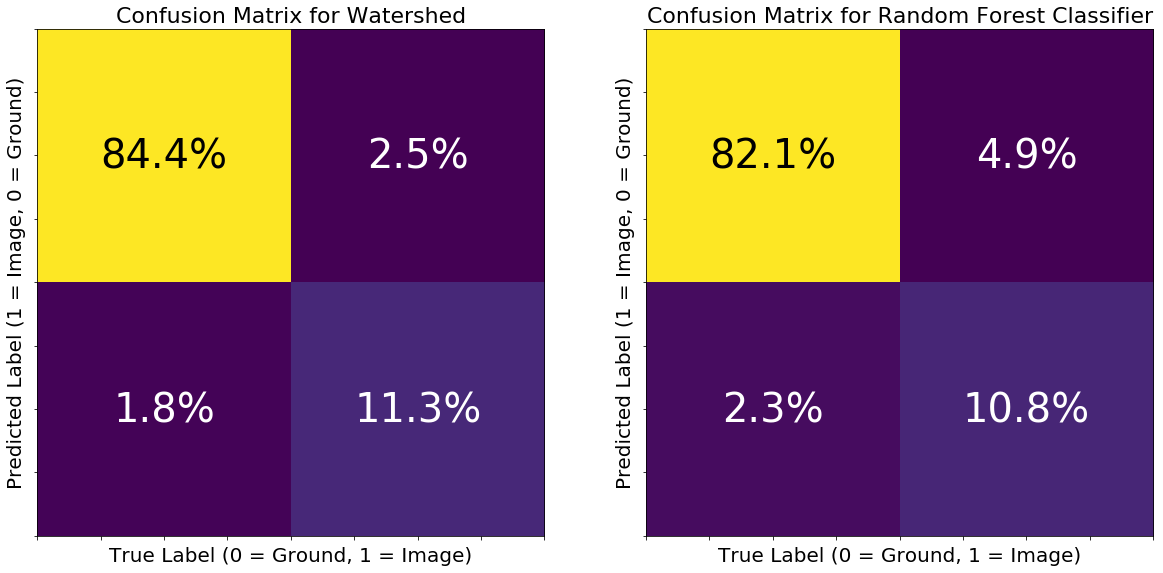

In [27]:
cm_ws = confusion_watershed*100/(sum(sum(confusion_watershed)))
cm_rfc = confusion_rfc*100/(sum(sum(confusion_rfc)))

fig, ax = plt.subplots(1,2, figsize = (20,10))

ax[0].imshow(cm_ws.T)
ax[0].set_title('Confusion Matrix for Watershed', fontsize=22)
ax[0].set_xlabel('True Label (0 = Ground, 1 = Image)', fontsize=20)
ax[0].set_ylabel('Predicted Label (1 = Image, 0 = Ground)', fontsize=20)
ax[0].set_yticklabels([])
ax[0].set_xticklabels([])
ax[0].text(-0.25, 0.05, f'{cm_ws[0][0]:.1f}%', color='black', fontsize=40)
ax[0].text(0.8, 0.05, f'{cm_ws[0][1]:.1f}%', color='white', fontsize=40)
ax[0].text(-0.2, 1.05, f'{cm_ws[1][0]:.1f}%', color='white', fontsize=40)
ax[0].text(0.75, 1.05, f'{cm_ws[1][1]:.1f}%', color='white', fontsize=40)

ax[1].imshow(cm_rfc.T)
ax[1].set_title('Confusion Matrix for Random Forest Classifier', fontsize=22)
ax[1].set_xlabel('True Label (0 = Ground, 1 = Image)', fontsize=20)
ax[1].set_ylabel('Predicted Label (1 = Image, 0 = Ground)', fontsize=20)
ax[1].set_yticklabels([])
ax[1].set_xticklabels([])
ax[1].text(-0.25, 0.05, f'{cm_rfc[0][0]:.1f}%', color='black', fontsize=40)
ax[1].text(0.8, 0.05, f'{cm_rfc[0][1]:.1f}%', color='white', fontsize=40)
ax[1].text(-0.2, 1.05, f'{cm_rfc[1][0]:.1f}%', color='white', fontsize=40)
ax[1].text(0.75, 1.05, f'{cm_rfc[1][1]:.1f}%', color='white', fontsize=40)

plt.show()
# plt.savefig('fig19.png')

Not surprisingly, most of our pixels are true negatives (background) or true positives (object). We have twice as many false negatives as false positives, consistent across watershed and random forest classification. 

This class imbalance among pixels (i.e. signficantly more background pixels) is why we have looked at multiple error metrics, and also why our training was done on the "uncertain" area of the image, where object and ground classes were more equally balanced.

# 4. Discussion: Reducing Error with Dimensionality Reduction

As seen above, we have high scores for detection but lower scores for image segmentation. A significant challenge is that imaging, staining, and sample preparation conditions can vary dramatically. There does not exist a "general" method capable of accurate nucleus segmentation across cell types and image types. 

Since we are aiming for above 80% (expected) or 90% (high) levels of success, we flagged any images with < 70% accuracy OR precision to understand why and how our prediction was incorrect, and to improve the model particularly for those images.

## 4.1. Dimensionality Reduction

Our initial attempt at nucleus segmentation involved using a (PCA, SVM) method. However these methods scaled poorly with the number of total pixels in the dataset. Even when the training set was restricted to the uncertain region of each image, training the SVM took approximately 20 minutes for the first 15 images.

Random forest classifiers can be trained faster than SVM while maintaining comparable accuracy. We used random forest classifier to determine nucleus vs background pixels. Pixels in the unknown region for each image, which was determined using watershed segmentation, were used as the training set.

Applying dimensional reduction to the training set is one way of reducing the complexity of the problem, but implementing dimensionality reduction proved to be inefficient, even when applied to just the reduced pixels in the "uncertain" area identified by watershed.

We tried linear SVM and PCA, both of which did not complete in 10x the training time for the Random Forest (see Table 1). Based on our research into time complexity of training different methods (the complexity of testing is typically an order of magnitude lower), k-means clustering seemed like an efficient approach.

#### Table 1. Time Complexity Comparison for Dimensionality Reduction and Classification Methods
|   | Complexity (of training) | n (# of samples) | d (# of features) |
|------|------|------|------|
|PCA | $O(n * d^2$ + $d^3)$ | 665 images | ~1.5 M pixels in largest image | 
|SVM (RBF kernel)| $O(n^3)$ [1] | ~13 M reduced pixels | 7 features |
|SVM (Linear) | $O(n^2)$ [2] | ~13 M reduced pixels | 7 features |
|KMEANS (Lloyd's algorithm)| $O(n*d*$(6 clusters)$*$(300 iterations)$)$ | 665 images | 6 geometry, 3 colour features |
|Random Forest |  $O(n*d*$(10 trees)$*$(5 depth)$)$ | ~13 M reduced pixels | 7 features |

[1] Srebro and Shalev-Shwartz. "SVM Optimization: Inverse Dependence on Training Set Size" (<b>2008</b>) <i>Proceedings of ICML</i>, doi:10.1.1.139.2112

[2] Bordes, et al. "Fast Kernel Classifiers with Online and Active Learning". (<b>2005</b>) <i>J Mach Learn Res</i>, 6, 1579–1619, doi:10.1.1.60.9676.</i>

## 4.2. K-means clustering

The k-means algorithms partitions observations (feature vectors) in the given data into $k$ mutually exclusive clusters such that each point belongs to the cluster with the nearest mean, which is measured by the Euclidean distance.

<u>Advantages</u>: efficient, easy to implement, easy to interpret

<u>Disadvantages</u>: different results with each run depending on the initial random assignments, does not ensure results has global minimum variance, needs to known how many clusters to find

To choose a feature vector, we can look at the images in the training set and see immediately that they tend to differ based on both cell features (geometry, shape, etc) and colour. Therefore we train a k-means clustering algorithm on geometry features and colour features, then combine the resulting classes to get six (6) overall classes.

Geometry feature vector:
* max contour area value per image
* mean contour area value per image
* number of contours per image
* average value of gray pixels per image
* width per image
* length per image

Colour feature vector:
* red per image
* green per image
* blue per image

In [ ]:
# Get image information, apply clustering
def get_image_info(samples):
        # geometry features
        max_cnt_area = [] # max contour area value per image   
        avg_cnt_area = [] # mean contour area value per image
        num_cnt = [] # how many contour areas per image
        wid_list = [] #  width per image
        len_list = [] #  length per image
        # colour features
        avg_grey = [] # average value of gray pixels per image
        r = [] #  red per image
        g = [] # green  
        b = [] # blue

        for i in samples:
            (img, masks) = load_zipped_img(path+'/stage1_train.zip', i) 
            r.append(np.average(img[:,:,0]))
            g.append(np.average(img[:,:,1]))
            b.append(np.average(img[:,:,2]))
            img = float2int8(grayscale(img))

            # in some cases, image background is bright and cell darker, there needs a inverse of pixel value
            if np.average(img) > 125:
                img = 255 - img

            length = img.shape[0]
            len_list.append(length)
            width = img.shape[1]
            wid_list.append(width)
            avg_grey.append(np.average(img))

            # use opencv to find contour and get some statistic data
            img = cv2.GaussianBlur(img, (3, 3), 1)
            ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)

            _, cnts, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
            cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
            max_cnt_area.append(cv2.contourArea(cnts[0])/length/width)

            av = 0
            for i in cnts:
                av = av + cv2.contourArea(i)
            av = av/len(cnts)

            # since different pic has different size, we'd better normalise it 
            avg_cnt_area.append(av/length/width)
            num_cnt.append(len(cnts))

        df = pd.DataFrame({'max_area':max_cnt_area,'average_area':avg_cnt_area,
                           'num_cnt':num_cnt,'average_grey':avg_grey,'wid':wid_list,'len':len_list,
                           'r':r,'g':g,'b':b
                          }) 
        return df

In [32]:
if recluster == 'yes':
    %time df_kmeans = get_image_info(range(0,n_samples))
    
    # train geometry classes
    input_geometry = np.array(df_kmeans[['max_area','average_area','num_cnt','average_grey','wid','len']])
    %time geometry_kmeans = KMeans(n_clusters = 3).fit(input_geometry) 
    df_kmeans['geometry_class'] = geometry_kmeans.labels_

    # train colour classes
    input_colour = np.array(df_kmeans[['r','g','b']])
    %time colour_kmeans = KMeans(n_clusters = 3).fit(input_colour) 
    df_kmeans['colour_class'] = colour_kmeans.labels_

    # and then make a combination
    df_kmeans['overall_class'] = 3*df_kmeans['geometry_class']
    df_kmeans['overall_class'] = df_kmeans['overall_class'] + df_kmeans['colour_class']

    df_kmeans.to_csv(kmeans_name)
else:
    df_kmeans = pd.read_csv(kmeans_name)

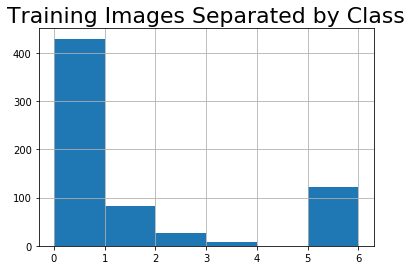

In [33]:
df_kmeans['overall_class'].hist(bins=6)
plt.title('Training Images Separated by Class', fontsize=22)
plt.show()
# plt.savefig('fig20.png')

There is significant class imbalance among the 6 classes identified by k-means clustering. However, instead of undersampling purposefully (the smallest classes have ~10 images), one way we could improve our model is by collecting additional data. IHC images with nuclei correctly pre-identified are readily available in databases and as part of journal articles.

Reprensentative images of the 6 classes identified by K-means clustering are shown below.

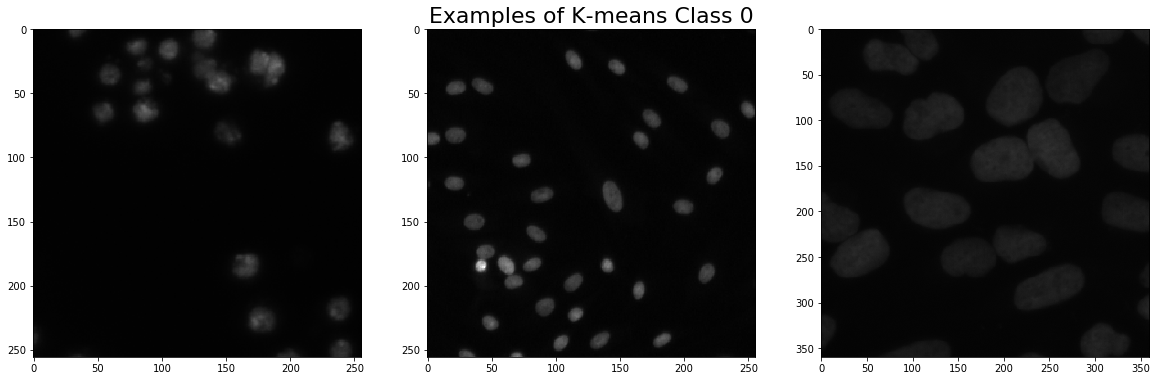

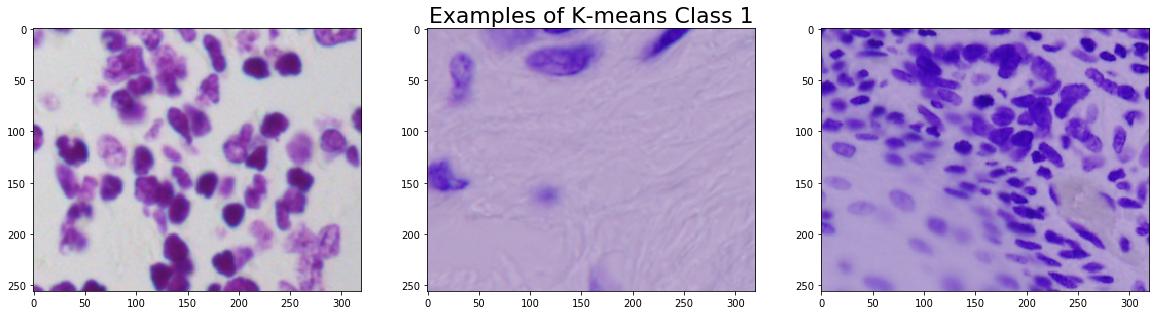

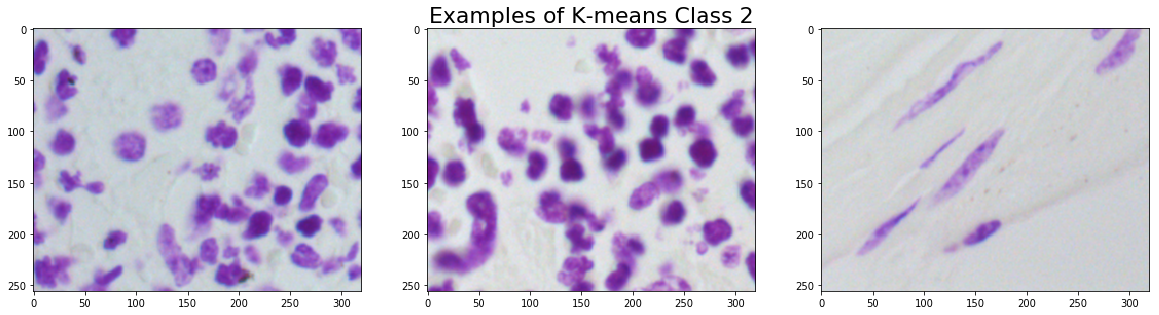

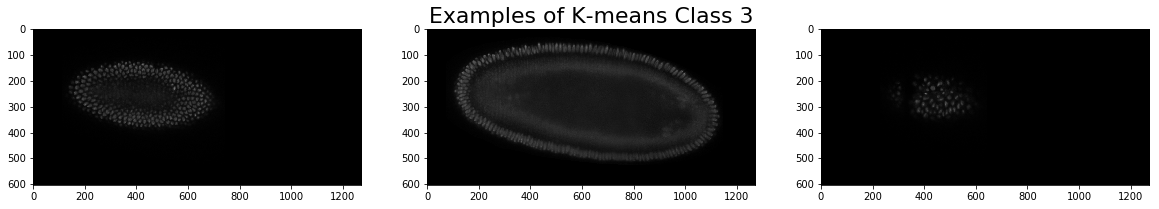

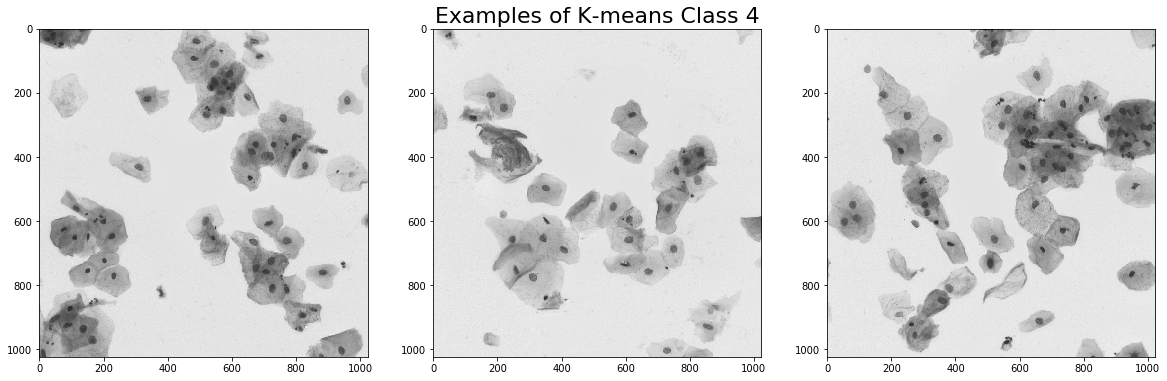

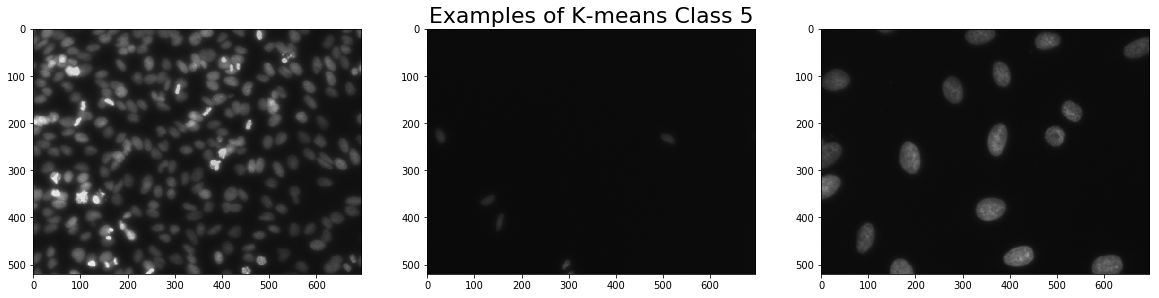

In [34]:
geo_f = 3
colour_f = 3
groups_list = []

for t in range(0, geo_f*colour_f):
    img_groups_list = df.loc[df_kmeans['overall_class'] == t].index.values
    if len(img_groups_list) > 0:
        groups_list.append(img_groups_list)

for k in range(0,len(groups_list)):
    figname = 'fig'+str(13+k)+'.png'
    img_title = 'Examples of K-means Class '+str(k)
    fig,ax= plt.subplots(1, 3, figsize=(20,10))
    current_group = groups_list[k]
    (img, masks) = load_zipped_img(path+'/stage1_train.zip', current_group[0])
    (img2, masks2) = load_zipped_img(path+'/stage1_train.zip', current_group[1])
    (img3, masks3) = load_zipped_img(path+'/stage1_train.zip', current_group[-1])
    ax[0].imshow(img)
    ax[1].imshow(img2)
    ax[1].set_title(img_title, fontsize=title_size)
    ax[2].imshow(img3)
    plt.show()
#     plt.savefig(figname)

## 4.3. Cluster-specific random forest classifiers

To improve the model performance, we retrained a random forest classifier for each cluster in the training set.

In [35]:
# Index groups
group_list = []
for i in range(0,9):
    img_group = df_kmeans.loc[df_kmeans['overall_class'] == i].index.values
    if len(img_group) > 0:
        group_list.append(img_group)
group_number = len(group_list)
print('There are {} cluster centers for this dataset.'.format(group_number))

There are 6 cluster centers for this dataset.


As with the random forest classifier before, after we train the cluster-specific random forest models once we can simply import in the future.

In [36]:
# option to retrain forest or use saved forests

if retrain_kmeans_forest == 'yes':
    model_list = []
    start = time.time()
    for k in range(0,group_number):
        x_train_new = np.zeros(7).reshape(-1,7)
        y_train_new = np.zeros(1).reshape(-1,1)
        for i in group_list[k]:
            #print(i)
            (img, masks) = load_zipped_img(path+'/stage1_train.zip', i) # loads image and associated masks

            (img_guess, markers, sure_bg, sure_fg, uncertain) = watershed(img)

            intensity = grayscale(img) # grayscale pixel intensity, continuous
            img_guess = grayscale(img_guess)

            filter_sobel = sobel(grayscale(img))[uncertain==255].reshape(-1,1) # gradient of pixel intensity, discrete
            filter_laplace = laplace(grayscale(img))[uncertain==255].reshape(-1,1) # Laplacian of pixel intensity, discrete

            intensity_raw = intensity[uncertain==255].reshape(-1,1)
            watershed_predict = img_guess[uncertain==255].reshape(-1,1) # watershed prediction for each pixel, discrete

            img3 = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
            r,g,b = cv2.split(img3)
            r = r[uncertain==255].reshape(-1,1) # red colour channel intensity, continuous
            g = g[uncertain==255].reshape(-1,1)
            b = b[uncertain==255].reshape(-1,1)

            feature = np.concatenate((intensity_raw, watershed_predict, filter_sobel, filter_laplace, r, g, b), axis = 1)

            y_raw = sum(masks)
            y_raw = y_raw[uncertain==255].reshape(-1,1)

            x_train_new = np.append(x_train_new, feature).reshape(-1,7)
            y_train_new = np.append(y_train_new, y_raw).reshape(-1,1)

        x_train_new = x_train_new[1:,:]
        y_train_new = y_train_new[1:,0]

        clf_KM_rfc = RandomForestClassifier(max_depth=5, random_state=0)
        %time clf_KM_rfc.fit(x_train_new, y_train_new)
        joblib.dump(clf_KM_rfc, 'Random_Forest_KMEANS_{}.pkl'.format(k))
        model_list.append('Random_Forest_KMEANS_{}.pkl'.format(k))
    end = time.time()
    print('Time elapsed for ', n_samples, 'training images:', (end-start)) 
else:
    model_list = [clf_name_0, clf_name_1, clf_name_2, clf_name_3, clf_name_4, clf_name_5]

In [38]:
# test the KMEANS + RFC approach
if rescore_kmrfc == 'yes':
    score_kmrfc = []
    y_test = np.zeros(1)
    y_kmrfc = np.zeros(1)

    start = time.time()
    for k in range(0, group_number):
        clf_improved = joblib.load(model_list[k])
        for i in group_list[k]:
            (img, masks) = load_zipped_img(path+'/stage1_train.zip', i)
            print(i)
            img_shape = grayscale(img).shape

            y_real = sum(masks).reshape(-1,1)

            # random forest prediction
            feature = make_full_feature(img)
            y_test = np.append(y_test, y_real).reshape(-1,1)

            # Kmeans rfc score
            yp_kmrfc = clf_improved.predict(feature)
            y_kmrfc = np.append(y_kmrfc, yp_kmrfc).reshape(-1,1)
            acc_kmrfc = sklearn.metrics.accuracy_score(y_real, yp_kmrfc)
            prec_kmrfc = sklearn.metrics.precision_score(y_real, yp_kmrfc)
            f1_kmrfc = sklearn.metrics.f1_score(y_real, yp_kmrfc)
            labels_kmrfc, nlabels_kmrfc, label_mask_kmrfc = separate_obj(grayscale(yp_kmrfc.reshape(img_shape[0], img_shape[1])))
            masks_kmrfc = predicted_mask_list(labels_kmrfc)
            iou_kmrfc = iou(yp_kmrfc, masks_kmrfc, masks)
            score_kmrfc.append([acc_kmrfc, prec_kmrfc, f1_kmrfc, np.mean(iou_kmrfc)])
    end = time.time()
    print('Time elapsed to re-score kmeans RFC:', (end-start))
    new_scores = np.array(score_kmrfc)
    np.savetxt(kmrfc_name, new_scores, delimiter=',')
    confusion_kmrfc = confusion_matrix(y_test[1:,:], y_kmrfc[1:,:])
    np.savetxt(kmrfc_cm, confusion_kmrfc, delimiter=',')
else:
    new_scores = np.loadtxt(kmrfc_name, delimiter=',')
    confusion_kmrfc = np.loadtxt(kmrfc_cm, delimiter=',')

In [39]:
print('Random forest accuracy: cluster-specific = {:.1f}% ; general = {:.1f}%'.format(np.mean(new_scores[:,0])*100, .960*100))
print('Random forest precision: cluster-specific = {:.1f}% ; general = {:.1f}%'.format(np.mean(new_scores[:,1])*100, .800*100))
print('Random forest f1-score: cluster-specific = {:.1f}% ; general = {:.1f}%'.format(np.mean(new_scores[:,2])*100, .807*100))
print('Random forest IoU: cluster-specific = {:.1f}% ; general = {:.1f}%'.format(np.mean(new_scores[:,3])*100, .553*100))

Random forest accuracy: cluster-specific = 96.4% ; general = 96.0%
Random forest precision: cluster-specific = 81.0% ; general = 80.0%
Random forest f1-score: cluster-specific = 82.9% ; general = 80.7%
Random forest IoU: cluster-specific = 57.2% ; general = 55.3%


The cluster-specific random forest yields better results over the general random forest, particularly for the Jaccard index (IoU score). We also show the confusion matrix below, where the number of false negatives is reduced by ~70% and the number of false positives is nearly halved.

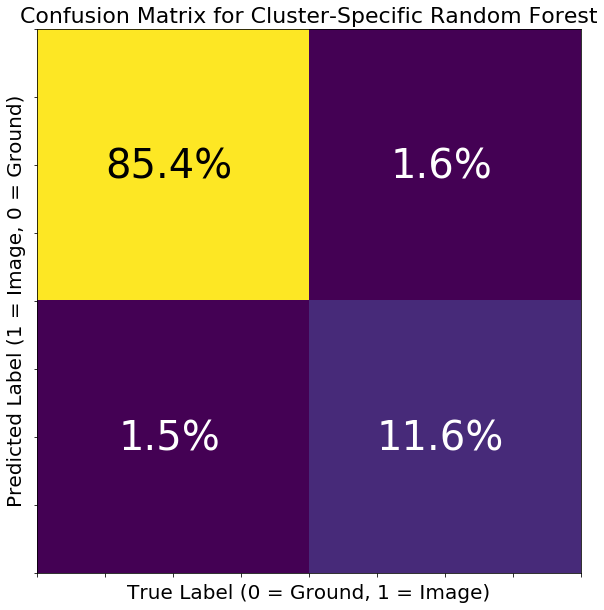

In [40]:
cm_kmrfc = confusion_kmrfc*100/(sum(sum(confusion_kmrfc)))
fig, ax = plt.subplots(figsize = (20,10))

ax.imshow(cm_kmrfc.T)
ax.set_title('Confusion Matrix for Cluster-Specific Random Forest', fontsize=22)
ax.set_xlabel('True Label (0 = Ground, 1 = Image)', fontsize=20)
ax.set_ylabel('Predicted Label (1 = Image, 0 = Ground)', fontsize=20)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.text(-0.25, 0.05, f'{cm_kmrfc[0][0]:.1f}%', color='black', fontsize=40)
ax.text(0.8, 0.05, f'{cm_kmrfc[0][1]:.1f}%', color='white', fontsize=40)
ax.text(-0.2, 1.05, f'{cm_kmrfc[1][0]:.1f}%', color='white', fontsize=40)
ax.text(0.75, 1.05, f'{cm_kmrfc[1][1]:.1f}%', color='white', fontsize=40)
plt.show()

We can see that pre-clustering the training data improves the predictions for images with large cells, but small nuclei. A comparison of segmentation methods is shown below for image #23.

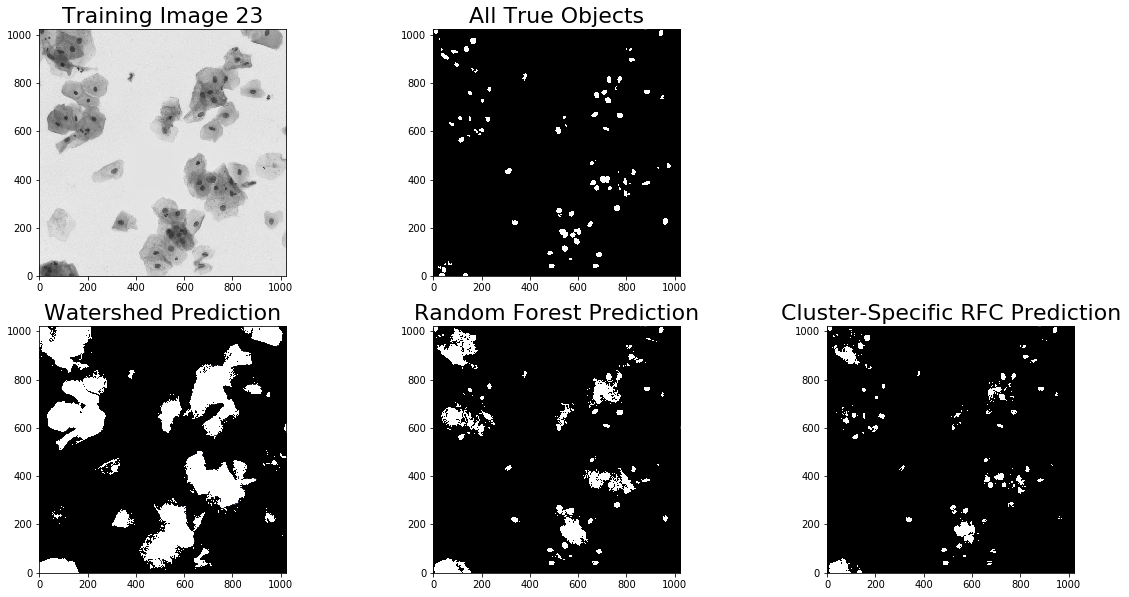

In [41]:
## PLOTTING RANDOM FOREST IMG23
img_no = 23

for k in range(0,group_number):
    for i in group_list[k]:
        if i == img_no:
            img_group = k

clf_improved = clf_improved = joblib.load(model_list[img_group])

(img, masks) = load_zipped_img(path+'/stage1_train.zip', img_no)
(img_guess, markers, sure_bg, sure_fg, uncertain) = watershed(img)
img_shape = grayscale(img).shape

feature = make_full_feature(img)
yp = clf.predict(feature)
yp_km_rfc = clf_improved.predict(feature)
fig, ax = plt.subplots(2,3, figsize=(20,10))

ax[0,0].imshow(img, origin='lower')
ax[0,0].set_title('Training Image {}'.format(img_no), fontsize=title_size)
ax[0,1].imshow(sum(masks), origin='lower', cmap='bone')
ax[0,1].set_title('All True Objects', fontsize=title_size)
ax[0,2].axis('off')
ax[1,0].imshow(grayscale(img_guess), origin='lower', cmap='bone')
ax[1,0].set_title('Watershed Prediction', fontsize=title_size)
ax[1,1].imshow(grayscale(yp.reshape(img_shape[0], img_shape[1])), origin='lower', cmap='bone')
ax[1,1].set_title('Random Forest Prediction', fontsize=title_size)
ax[1,2].imshow(grayscale(yp_km_rfc.reshape(img_shape[0], img_shape[1])), origin='lower', cmap='bone')
ax[1,2].set_title('Cluster-Specific RFC Prediction', fontsize=title_size)
plt.show()
# plt.savefig('fig11.png')

Separating the training images using KMeans clustering can also reduce the number of false positives in complicated images such as number 175.

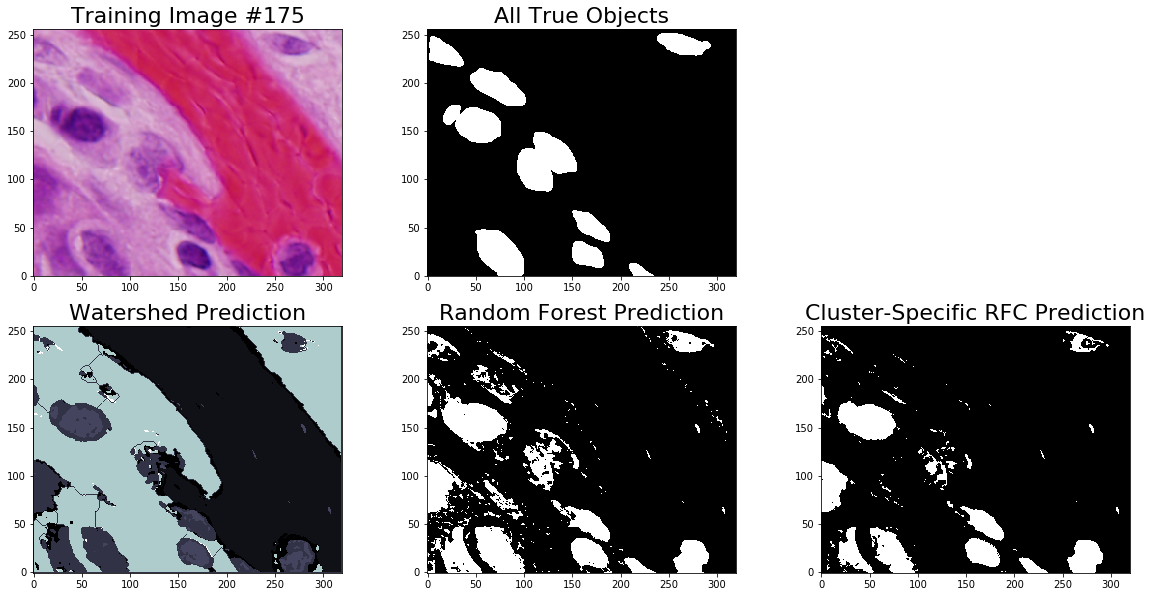

In [42]:
## PLOTTING RANDOM FOREST IMG175
img_no = 175

for k in range(0,group_number):
    for i in group_list[k]:
        if i == img_no:
            img_group = k

clf_improved = clf_improved = joblib.load(model_list[img_group])


(img, masks) = load_zipped_img(path+'/stage1_train.zip', img_no)
(img_guess, markers, sure_bg, sure_fg, uncertain) = watershed(img)
img_shape = grayscale(img).shape

feature = make_full_feature(img)
yp = clf.predict(feature)
yp_km_rfc = clf_improved.predict(feature)
fig, ax = plt.subplots(2,3, figsize=(20,10))

ax[0,0].imshow(img, origin='lower')
ax[0,0].set_title('Training Image #{}'.format(img_no), fontsize=title_size)
ax[0,1].imshow(sum(masks), origin='lower', cmap='bone')
ax[0,1].set_title('All True Objects', fontsize=title_size)
ax[0,2].axis('off')
ax[1,0].imshow(grayscale(img_guess), origin='lower', cmap='bone')
ax[1,0].set_title('Watershed Prediction', fontsize=title_size)
ax[1,1].imshow(grayscale(yp.reshape(img_shape[0], img_shape[1])), origin='lower', cmap='bone')
ax[1,1].set_title('Random Forest Prediction', fontsize=title_size)
ax[1,2].imshow(grayscale(yp_km_rfc.reshape(img_shape[0], img_shape[1])), origin='lower', cmap='bone')
ax[1,2].set_title('Cluster-Specific RFC Prediction', fontsize=title_size)
plt.show()
# plt.savefig('fig12.png')

To offer a better visual intuition for the improvement, especially in classes 3 and 4, we show the score breakdown for each of the classes identified by K-means clustering 

|   | Watershed|Random Forest|**Cluster Specific RF**|
|------|------|------|------|
|Accuracy| 96.7% | 96.9% | **97.2%** |
|Precision| 90.1% | 79.9% | **81.2%** |
|F1 Score| 85.0% | 81.1% | **84.3%** |

![Figure 13. Example Images Representative of K-means Class 0](Images/fig13.png)

|   | Watershed|Random Forest|**Cluster Specific RF**|
|------|------|------|------|
|Accuracy| 94.7% | 95.0% | **95.4%** |
|Precision| 84.9% | 87.4% | **86.1%** |
|F1 Score| 84.3% | 83.2% | **85.8%** |

![Figure 14. Example Images Representative of K-means Class 1](Images/fig14.png)

|   | Watershed|Random Forest|**Cluster Specific RF**|
|------|------|------|------|
|Accuracy| 91.1% | 92.3% | **93.2%** |
|Precision| 79.6% | 78.2% | **81.9%** |
|F1 Score| 78.3% | 80.1% | **80.7%** |

![Figure 15. Example Images Representative of K-means Class 2](Images/fig15.png)

|   | Watershed|Random Forest|**Cluster Specific RF**|
|------|------|------|------|
|Accuracy| 84.2% | 83.1% | **97.4%** |
|Precision| 36.5% | 38.8% | **80.5%** |
|F1 Score| 48.5% | 42.8% | **76.2%** |

![Figure 16. Example Images Representative of K-means Class 3](Images/fig16.png)

|   | Watershed|Random Forest|**Cluster Specific RF**|
|------|------|------|------|
|Accuracy| 80.6% | 97.7% | **98.9%** |
|Precision| 8.7% | 48.5% | **72.2%** |
|F1 Score| 16.0% | 59.8% | **69.0%** |

![Figure 17. Example Images Representative of K-means Class 4](Images/fig17.png)

|   | Watershed|Random Forest|**Cluster Specific RF**|
|------|------|------|------|
|Accuracy| 96.2% | 96.1% | **96.7%** |
|Precision| 92.9% | 88.8% | **89.4%** |
|F1 Score| 86.3% | 86.2% | **88.6%** |

![Figure 18. Example Images Representative of K-means Class 5](Images/fig18.png)

# 5. Conclusion

We accomplished the goals set out in our project proposal by normalizing/detecting/segmenting cell nuclei in the training image set, and achieved an expected (> 60%) to high (> 80%) level of success (depending on the k-means cluster) in terms of model performance as measured by multiple metrics. 

There did not seem to be a 'one-size-fits-all' model that performed well for all cell types and/or imaging conditions. Although we tried several approaches for detection and segmentation, we ultimately found most success with random forest classifiers trained on each of six clusters identifed by k-means clustering on the training set. The random forest classifiers were trained on uncertain image pixels (as identified by watershed) for each of the images in the training set. We calculated various statistical metrics, the confusion matrix, and also the Jaccard index (intersection over union). We tried two approaches for quantifying performance - (1) we first trained our model on the uncertain pixels from 665 training images and then 'tested' performance on the complete 665 training images, and compared this to (2) splitting the training set into 615 training images and 50 test images. In all cases, we found our performance to be very comparable (all scores within 5% variance, and relative trends preserved) for both of these methods.

A few next steps would be easy to implement for improved run time and performance. The current class imbalance between the six clusters identified could be corrected by augmenting the training data with IHC images from various cell types; there are many repositories of available IHC data with individual hand-labelled masks. In order to efficiently train and test models on more data, we would also look into either parallelizing our algorithms, or running them on a dedicated computation cluster (we ran into CPU memory issues towards the end of this project). Finally, we could improve the model itself either by switching to a convolutional neural network (the literature standard) or by adding pre-classification shape/contour fitting algorithms to better screen out non-cell artefacts from the background. 

Overall, we have developed a robust method which is a good first pass approach to the interesting, challenging, and high-stakes problem of automatically identifying cell nuclei from IHC images.